In [ ]:
# Project - Predicting Players Rating

<B>Importing Modules</B>

In [31]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>Data Pre-Processing</b>

In [2]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

<b>Data Exploration</b>

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [5]:
df.shape

(183978, 42)

<b>Data Cleaning</b>

In [6]:
df1 = df.dropna() #Drop the rows where at least one element is missing.
df1.shape

(180354, 42)

In [7]:
 #Dropping id, player_fifa_api_id and player_api_id columns
df1 = df1.drop(["id", "player_fifa_api_id", "player_api_id"], axis = 1)

In [8]:
clms = list(df1.columns[1:]) #Listing the columns of dataframe df1 starting from 2nd column
print(len(clms))
print(df1.columns)
print(clms)

38
Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')
['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', '

In [9]:
for col_name in df1.columns:
    if(df1[col_name].dtype == 'object'):
        df1[col_name]= df1[col_name].astype('category')
        df1[col_name] = df1[col_name].cat.codes

In [10]:
df1.fillna(-1,inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 39 columns):
date                   180354 non-null int16
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null int8
attacking_work_rate    180354 non-null int8
defensive_work_rate    180354 non-null int8
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
acceleration           180354 non-null float64
sprint_speed           180354 non-null float64
agility                180354 non-null float64
reactio

<b>Data Visualization</b>

overall_rating
potential
preferred_foot
attacking_work_rate
defensive_work_rate
crossing
finishing
heading_accuracy
short_passing
volleys
dribbling
curve
free_kick_accuracy
long_passing
ball_control
acceleration
sprint_speed
agility
reactions
balance
shot_power
jumping
stamina
strength
long_shots
aggression
interceptions
positioning
vision
penalties
marking
standing_tackle
sliding_tackle
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes


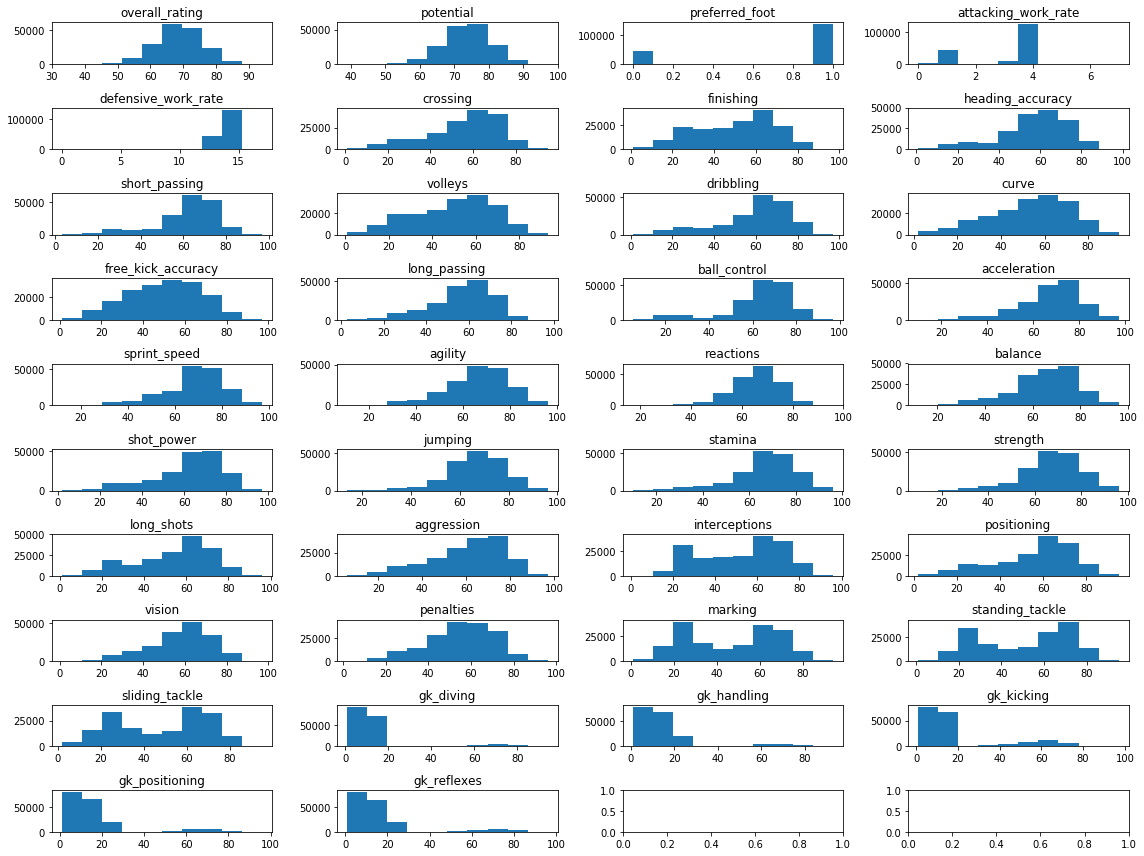

In [12]:
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < len(clms):
        print(clms[i])
        ax.hist(df1[clms[i]])
        ax.set_title(clms[i])
plt.tight_layout()
plt.show()

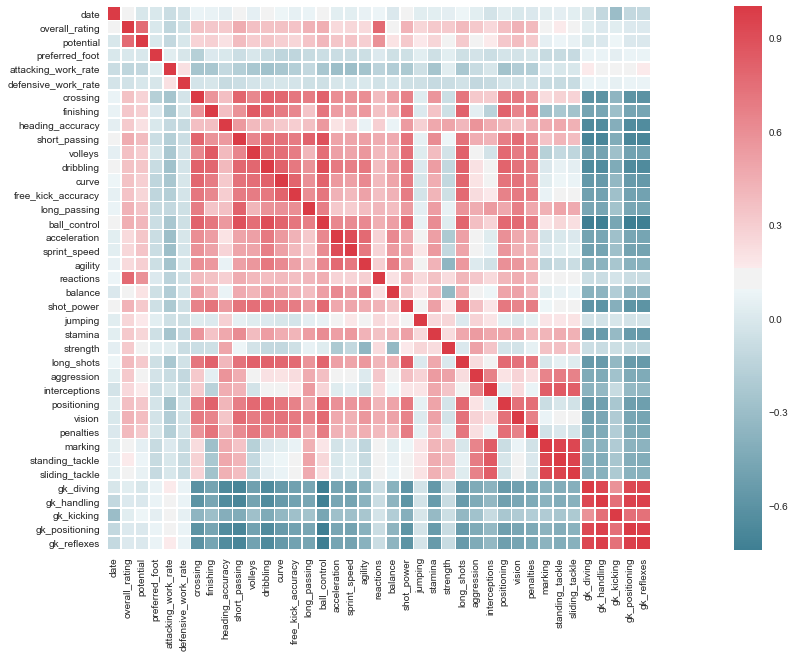

In [13]:
import numpy as np
#Correlation Matrix
sns.set(style="white")
df_corr= df1[1:]
corr = df_corr.dropna().corr() #Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) #Generate a mask 
f, ax = plt.subplots(figsize=(30, 10)) #Set up the matplotlib figure
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax) #Draw the heatmap with the mask and correct aspect ratio

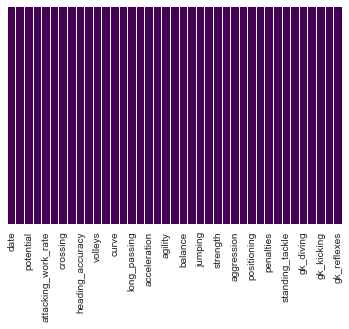

In [14]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<b>Test and Train Data Preparation </b>

In [15]:
y = df1['overall_rating']

In [16]:
X = df1[['date', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<b>Creating and Trainig the Model </b>

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#Printing intercept 
print(lm.intercept_)
lm.score

-2.821170891640662


<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [21]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 0.0076444   0.38533219 -0.00055612 -0.01980142 -0.05791433  0.02391491
  0.00973849  0.0710403   0.04248573  0.00632861 -0.01852194  0.00957416
  0.01428723  0.00740152  0.13346709  0.00876013  0.00803425 -0.01053037
  0.20737388  0.00938203  0.01607758  0.01351634 -0.00444327  0.05971453
 -0.01480641  0.02048163  0.01506217 -0.01135572  0.00312419  0.01545153
  0.03167769  0.00310368 -0.0316889   0.15402319  0.03619513 -0.0260819
  0.05390106  0.02102539]


<b>Predicting overall_rating using Test Data</b>

In [22]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

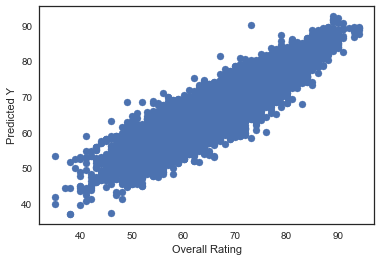

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Overall Rating')
plt.ylabel('Predicted Y')

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


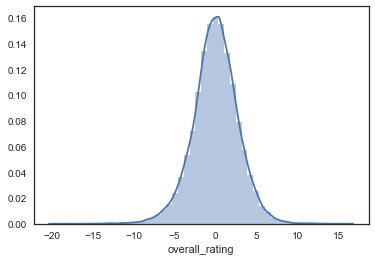

In [24]:
sns.distplot((y_test-predictions),bins=50);

<b>Model Evaluation Using Cross-Validation</b>

In [27]:
#Evaluating the model using 10-fold cross-validation
scores = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=10)
scores

array([-7.84916539, -7.53906033, -7.51546275, -7.62781351, -7.53293957,
       -7.98441976, -7.42500121, -7.72986974, -7.81702715, -7.66006882])

In [28]:
np.sqrt(scores.mean() * -1)

2.7691303366666746

In [29]:
print("The Root Mean Square Error using cross validation for the Model is "+ str(np.sqrt(scores.mean() * -1)) +" and the Results can be further improved using feature extraction and rebuilding, training the model.")

The Root Mean Square Error using cross validation for the Model is 2.7691303366666746 and the Results can be further improved using feature extraction and rebuilding, training the model.


In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:',sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.108831144434317
MSE: 7.587933929186613
RMSE: 2.7546204691729517


<b>Decision Tree Model</b>

In [33]:
# Instance of Decision Tree
decisiontree = DecisionTreeRegressor()
# Fit train data into the decision tree 
decisiontree.fit(X_train,y_train)
# Score of the Model for the train data provided
decisiontree.score(X_train,y_train)

1.0

In [34]:
# Predict now the Overall rating using the model and input Test Data
predictions = decisiontree.predict(X_test)

Text(0,0.5,'Predicted Y')

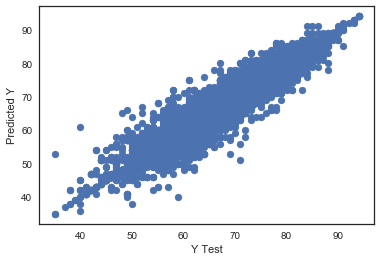

In [35]:
# Plot the Predicted values to the actual Test values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

D:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


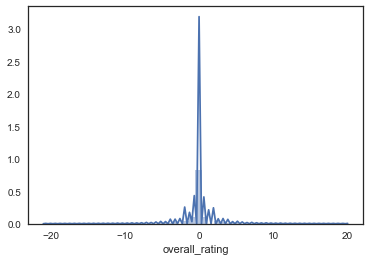

In [38]:
# Plot the graph to show how much variance is there between the predicted and actual values
sns.distplot((y_test-predictions),bins=50);

In [36]:
# Score of the model applied to the Test Data
decisiontree.score(X_test,y_test)

0.9573309385935889

In [37]:
# calculate these metrics by for the Predicted and Test Data
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:',sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6507845565268819
MSE: 2.110226033600089
RMSE: 1.4526617065236107
